# Describing the Combined Files and Defining Research Questions
#### Jameson Carter
#### 11/26/2021
The following code evaluates a joined file created in CombineData.ipynb. This file contains ACS tracts in Chicago and demographic information, complaints made against police officers in those locations, and geographic information about the city of chicago, within those tracts. 

In this file, we-

 - Provide some initial visualizations that describe this dataset.
 - Define some of our prediction variables, alongside some of our research questions.
 - Run a preliminary test

## Describe the Data

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
from shapely import wkt
from pyprojroot import here
import seaborn as sns
%matplotlib inline

In [37]:
data = pd.read_csv(here('./data/Combined.csv'))

### Evaluating the Target Variable- Complaints

Text(0.5, 1.0, 'Complaints in Chicago')

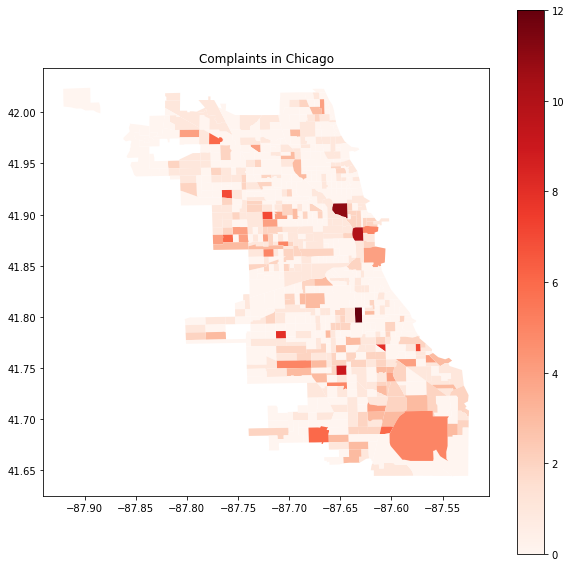

In [38]:
data['geometry'] = gpd.GeoSeries.from_wkt(data['geometry'])
plt.rcParams['figure.figsize'] = [10, 10]
GeoData = gpd.GeoDataFrame(data, geometry='geometry')
GeoData.plot("complaint_count", cmap = "Reds", legend = True)
plt.title('Complaints in Chicago')

The above plot shows that there are a few tracts where complaints are quite high, although there is not a clear geographic relationship. There seem to be higher numbers of complaints on the South Side of the city. However, population of these tracts varies. So we create a new variable mapping complaint rate, which normalizes complaints according to tract population, and map the same plot again.

The resulting plot flags one or two tracts as having particularly high rates per their populations, masking the relationships shown in the previous plot. The top three tracts by complaint rate turned out to be:
 - Tract 8356 (1.3%), which is a small tract nestled between a large highway and a railyard on the South side, with a police station nearby.
 - Tract 4212 (0.7%), which is another small tract nestled between a railyard on the South side and a large cemetary, with a police station nearby.
 - Tract 5003 (0.4%), is yet another small tract nestled between a railyard on the South side and a highway, and again, is right by a police station. 	
 
I evaluated these tracts using the following https://www.chicagocityscape.com/maps/?place=censustract-17031835600

Text(0.5, 1.0, 'Complaints Normalized Against Population in Chicago')

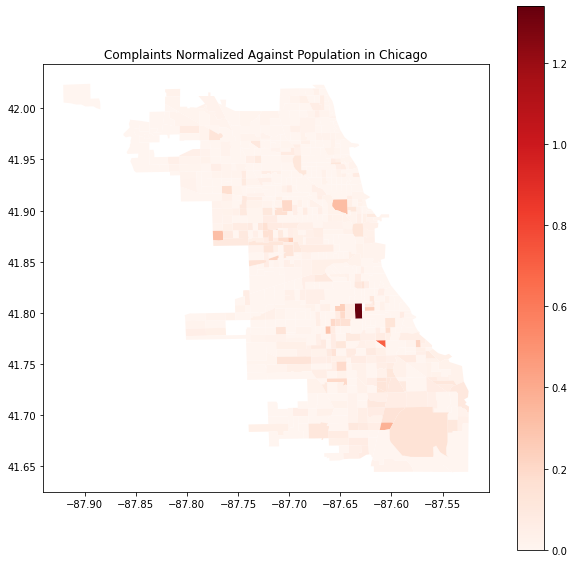

In [39]:
GeoData['complaint_rate'] = 100*GeoData['complaint_count']/GeoData['B01001_001E']
GeoData.plot("complaint_rate", cmap = "Reds", legend = True)
plt.title('Complaints Normalized Against Population in Chicago')

In [36]:
GeoData.sort_values('complaint_rate', ascending = False).head(3)

,geo_id,B01001_001E,DP02_0002PE,DP02_0004PE,DP02_0006PE,DP02_0010PE,DP02_0014PE,DP02_0015PE,DP02_0016E,DP02_0017E,...,geometry,GEOID10,complaint_count,police_stations,fire_stations,public_schools,parks,commercial_establishments,number_of_police_killings,complaint_rate
728,1400000US17031835600,896.0,16.5,3.5,39.8,40.2,14.4,60.2,2.08,3.17,...,"MULTIPOLYGON (((-87.63584 41.80905, -87.62892 ...",17031835600,12.0,1.0,0.0,0.0,1.0,43.0,0.0,1.339286
440,1400000US17031421200,1126.0,11.5,3.3,30.4,54.8,22.4,38.9,2.45,4.26,...,"MULTIPOLYGON (((-87.61304 41.77301, -87.60941 ...",17031421200,8.0,1.0,0.0,0.0,0.0,20.0,0.0,0.710480
495,1400000US17031500300,1598.0,18.7,11.5,22.9,46.9,18.7,16.0,2.00,2.97,...,"MULTIPOLYGON (((-87.61144 41.68572, -87.60986 ...",17031500300,6.0,1.0,0.0,1.0,1.0,25.0,0.0,0.375469


The following exploration finds that the typical tract (as defined by the median), exhibits a 0% complaint rate, because there are no complaints, while the average tract exhibits a 0.03% complaint rate. Less than 1 complaint is submitted within a given tract, on average.

In [43]:
GeoData[['complaint_rate','complaint_count']].describe()

,complaint_rate,complaint_count
count,798.000000,798.000000
mean,0.029584,0.810777
std,0.070619,1.383913
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.040219,1.000000
max,1.339286,12.000000


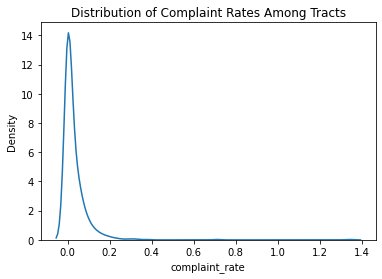

In [51]:
sns.kdeplot(GeoData['complaint_rate'])
plt.title('Distribution of Complaint Rates Among Tracts')
plt.show()

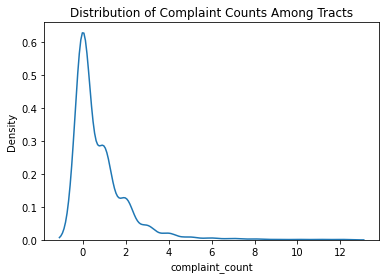

In [50]:
sns.kdeplot(GeoData['complaint_count'])
plt.title('Distribution of Complaint Counts Among Tracts')
plt.show()

### Evaluating the Target Variable's Relationship with Other Variables

## Research Question 1

## Research Question 2

## Research Question 3

## Preliminary Testing

## Sources

 - https://geopandas.org/en/stable/gallery/create_geopandas_from_pandas.html
 